In [67]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as matplot
import matplotlib
%matplotlib inline

import random
matplot.rcdefaults()
from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
import warnings
import tensorflow_datasets as tfds
import tensorflow as tf
warnings.filterwarnings('ignore')

In [120]:
mnist = tf.keras.datasets.mnist

from keras.utils import to_categorical

In [118]:
import zipfile,cv2

In [131]:

local_zip = '/content/USPS_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/trainntest')

train_dir = '/content/trainntest/train'
validation_dir = '/content/trainntest/test'
y_train = []
y_test = []
for path in os.listdir(train_dir):
    if os.path.isfile(os.path.join(train_dir, path)):
        y_train.append(int(path[0]))

for path in os.listdir(validation_dir):
  if os.path.isfile(os.path.join(validation_dir, path)):
      y_test.append(int(path[0]))

x_train = []
for path in os.listdir(train_dir):
  if os.path.isfile(os.path.join(train_dir,path)):
    x_train.append(cv2.cvtColor(cv2.imread(f"{train_dir}/{path}"), cv2.COLOR_RGB2GRAY))

x_test = []
for path in os.listdir(validation_dir):
  if os.path.isfile(os.path.join(validation_dir,path)):
    x_test.append(cv2.cvtColor(cv2.imread(f"{validation_dir}/{path}"), cv2.COLOR_RGB2GRAY))

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


x_train_final = x_train.reshape(-1 ,16*16) / 255
x_test_final = x_test.reshape(-1 ,16*16) / 255



In [132]:
train, trlab, test, tslab  = x_train_final, y_train, x_test_final, y_test

In [126]:
train.shape

(7291, 256)

In [133]:
def pick(train, trlab, test, tslab, percentage):
  train = train[:int(len(train)*percentage)]
  test = test[:int(len(test)*percentage)]
  trlab = trlab[:int(len(trlab)*percentage)]
  tslab = tslab[:int(len(tslab)*percentage)]
  return train, trlab, test, tslab

In [134]:
train, trlab, test, tslab = pick(train, trlab, test, tslab, 0.05)

In [135]:
svm = LinearSVC(dual=False, verbose=1)
svm.fit(train, trlab)

[LibLinear]

LinearSVC(dual=False, verbose=1)

In [136]:
svm.coef_
svm.intercept_

array([-0.71078573, -0.23419634, -0.16636508, -0.76613492, -0.01311585,
       -0.62888266, -0.28157165, -0.01484649, -0.55359038, -0.76468539])

In [137]:
pred = svm.predict(test)

In [138]:
accuracy_score(tslab, pred) # Accuracy

0.79

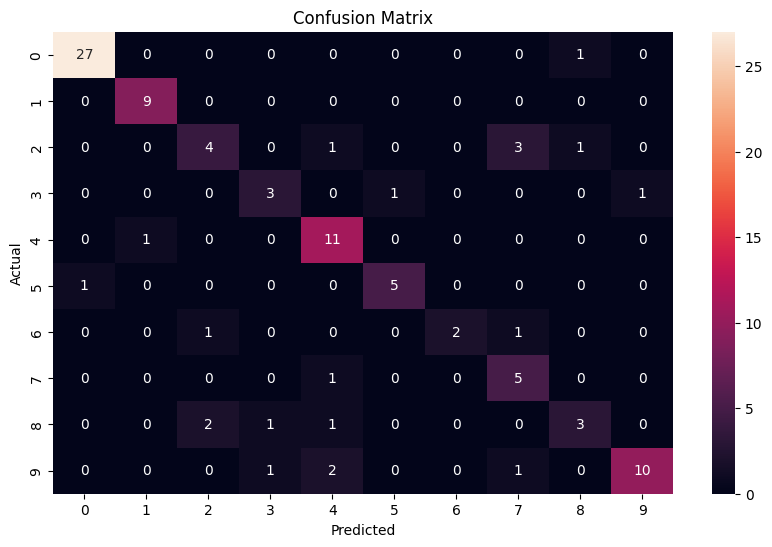

In [139]:
cm = confusion_matrix(tslab, pred)
matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

**with Penalty(L2)**
power 2

In [140]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c)
    svm.fit(train, trlab)
    coef = svm.coef_
    
    p_tr = svm.predict(train)
    a_tr = accuracy_score(trlab, p_tr)
    
    pred = svm.predict(test)
    a = accuracy_score(tslab, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)
    print(f"done for {c}")

done for 0.0001
done for 0.001
done for 0.01
done for 0.1
done for 1
done for 10
done for 100
done for 1000
done for 10000


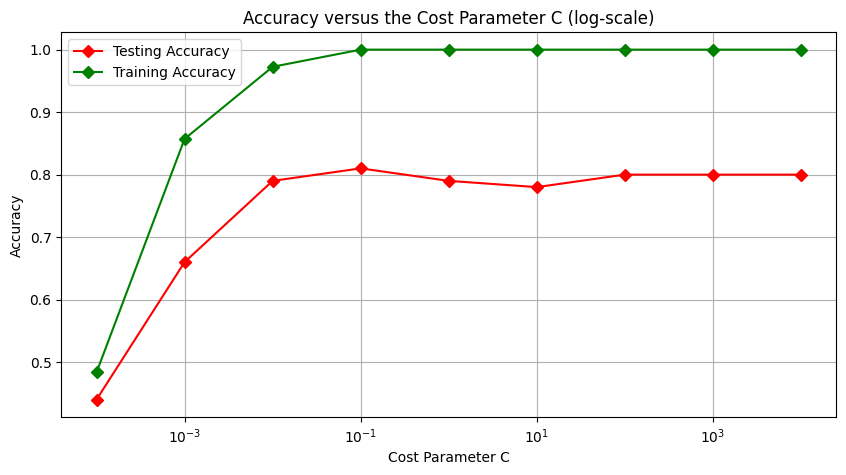

In [141]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

**c = 1 : the Best**

In [142]:
svm_coef = coefficient[4]
svm_coef.shape

(10, 256)

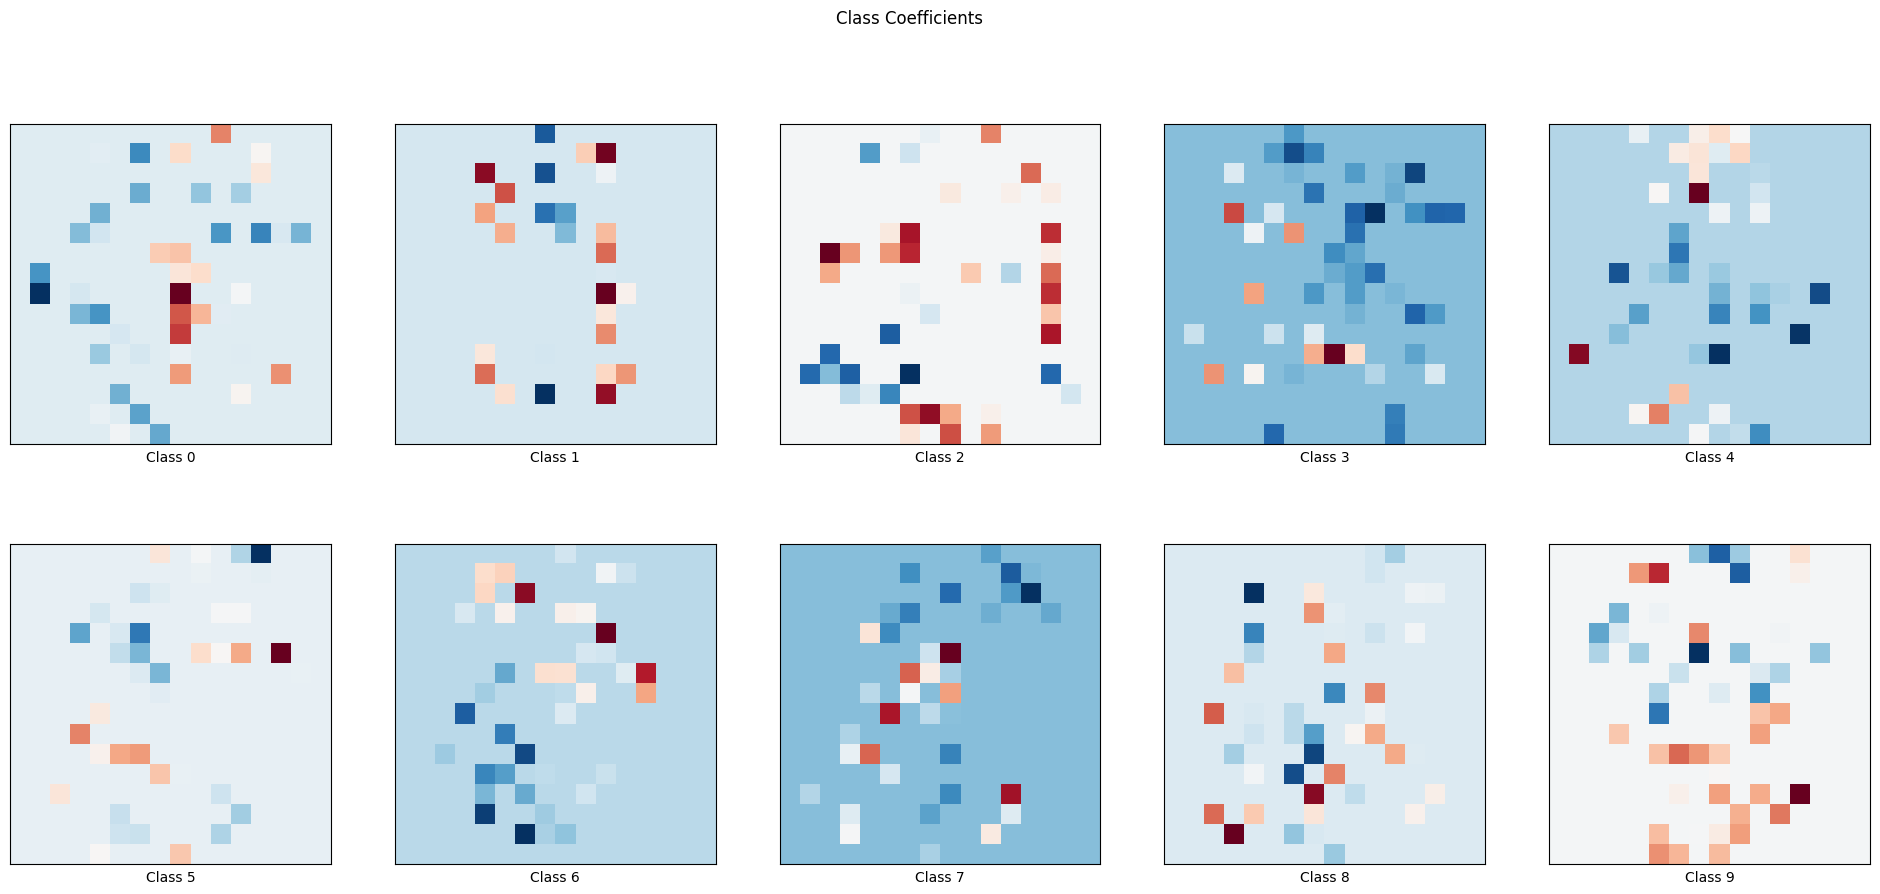

In [167]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

**With Penalty (L1)**

In [144]:
acc = []
acc_tr = []
coefficient = []
for c in [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]:
    svm = LinearSVC(dual=False, C=c, penalty='l1')
    svm.fit(train, trlab)
    coef = svm.coef_
    
    p_tr = svm.predict(train)
    a_tr = accuracy_score(trlab, p_tr)
    
    pred = svm.predict(test)
    a = accuracy_score(tslab, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

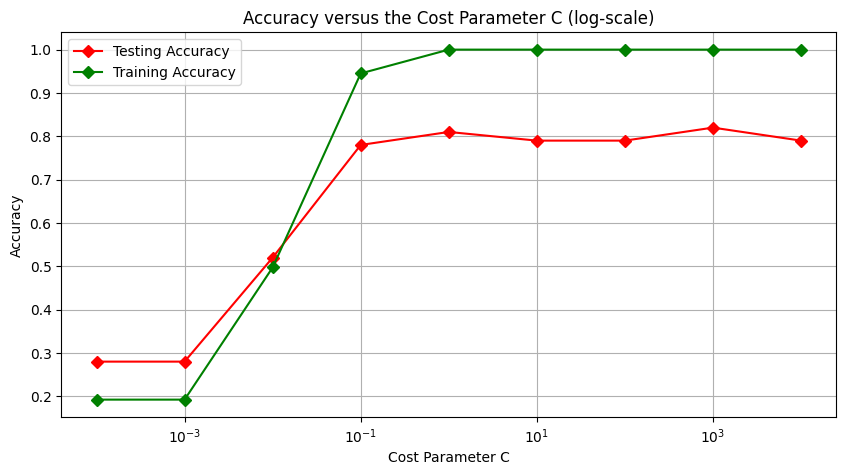

In [145]:
c = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

**c = 1 : the Best**

In [146]:
svm_coef = coefficient[4]
svm_coef.shape

(10, 256)

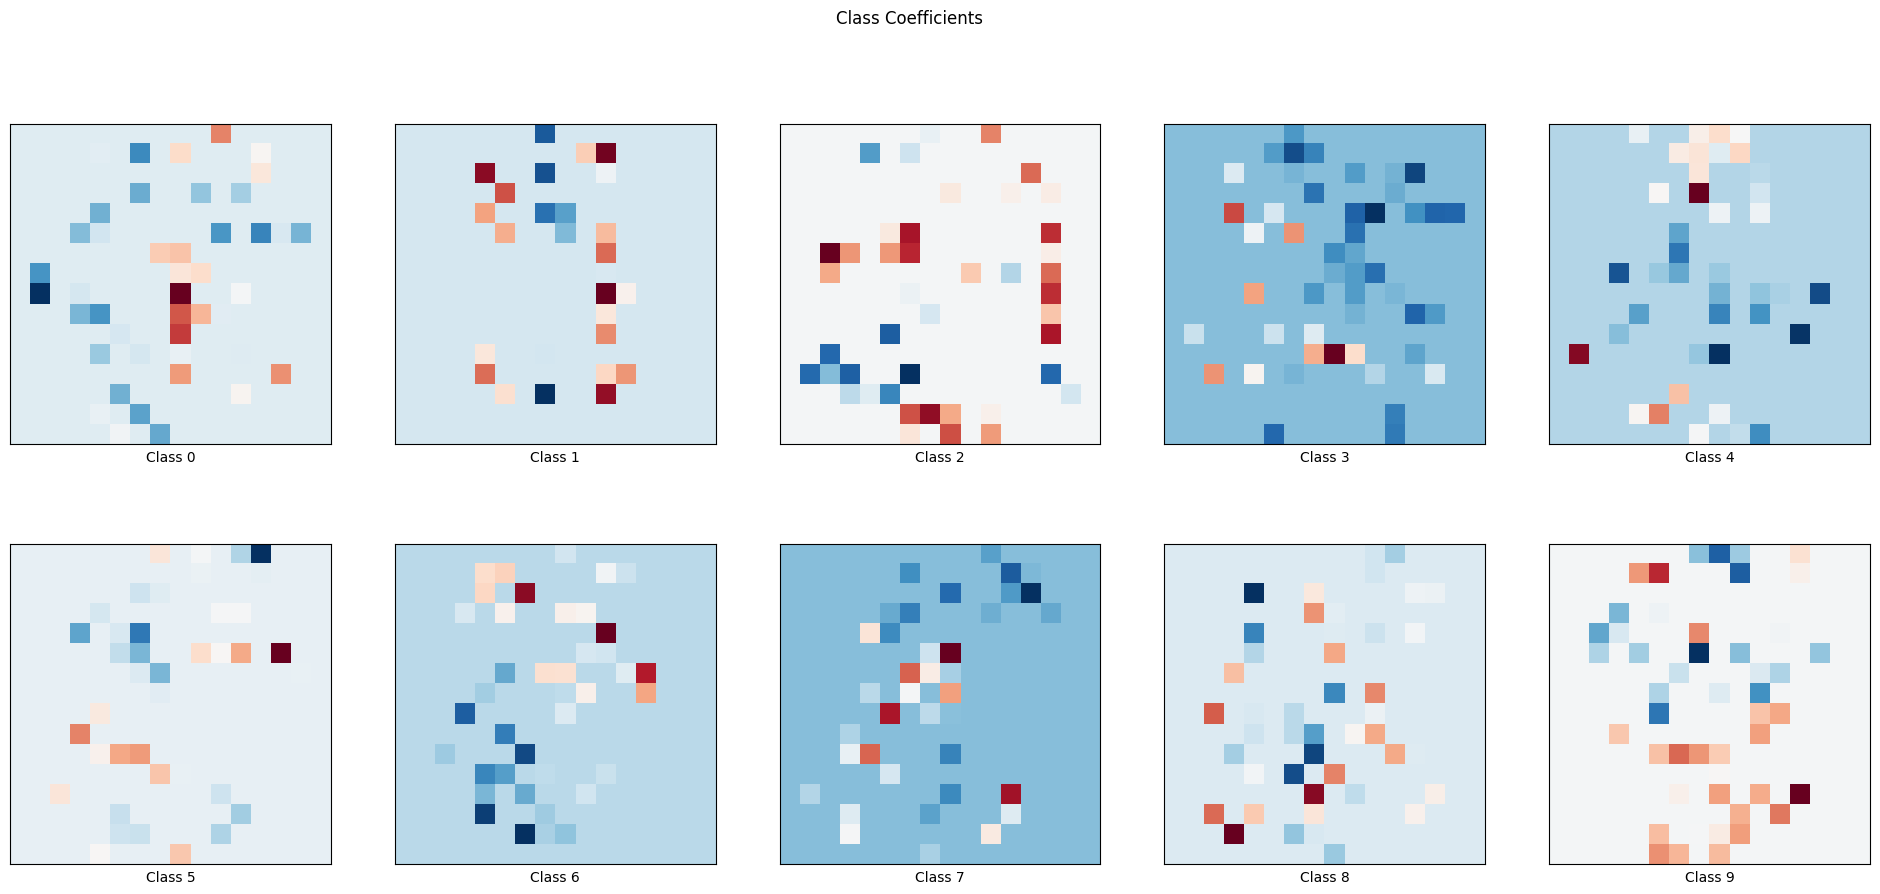

In [168]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

**SVM RBF Kernel**

generate a random sample of the data and check how the distribution is compared to the original distribution

In [148]:
seq = np.random.randint(0,len(train),int(0.6*(len(train))))
train_samp = train[seq]
trlab_samp = trlab[seq]

train_samp.shape
trlab_samp.shape

(218,)

In [149]:
seq = np.random.randint(0,len(test),int(0.6*(len(test))))
test_samp = test[seq]
tslab_samp = tslab[seq]

test_samp.shape
tslab_samp.shape

(60,)

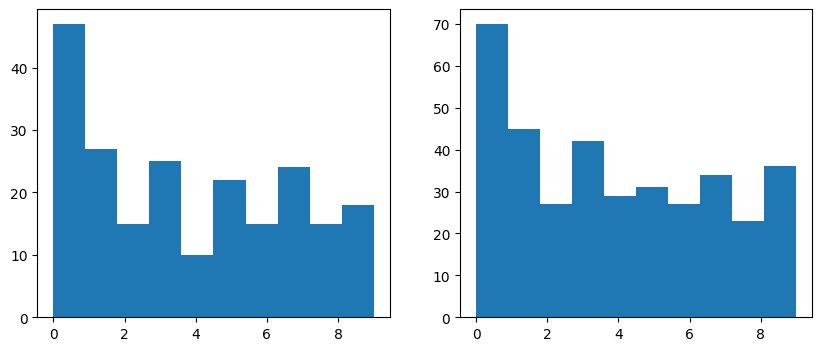

In [150]:
fig, ax = matplot.subplots(1,2, figsize=(10,4))
ax[0].hist(trlab_samp)
ax[1].hist(trlab)
fig.show
matplot.show()

**Running SVC for multiple cost factor(s) C and Gamma**

In [151]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','gamma','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for g in [0.01, 0.1, 1, 10, 100]:
        svm = SVC(kernel='rbf', C=c, gamma=g)
        model = svm.fit(train_samp, trlab_samp)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_
    
        p_tr = svm.predict(train_samp)
        a_tr = accuracy_score(trlab_samp, p_tr)
    
        pred = svm.predict(test_samp)
        a = accuracy_score(tslab_samp, pred)
    
        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,g,a_tr,a]
        i=i+1

In [152]:
df

,c,gamma,train_acc,test_acc
0,0.01,0.01,0.215596,0.266667
1,0.01,0.10,0.215596,0.266667
2,0.01,1.00,0.215596,0.266667
3,0.01,10.00,0.215596,0.266667
4,0.01,100.00,0.215596,0.266667
5,0.10,0.01,0.339450,0.333333
6,0.10,0.10,0.330275,0.316667
7,0.10,1.00,0.215596,0.266667
8,0.10,10.00,0.215596,0.266667
9,0.10,100.00,0.215596,0.266667


We choose C=10 and Gamma=0.01 to look at the Support vectors

In [153]:
pd.DataFrame(coefficient[15]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,1.872539,0.115037,0.580169,0.350401,0.391222,0.000000,0.000000,...,-0.000000,-0.417007,-0.722089,-0.000000,-2.743269,-0.000000,-0.470955,-2.216434,-0.277803,-0.529040
1,0.000000,0.000000,0.000000,2.921092,0.937161,1.180128,0.664450,0.307305,0.000000,0.119519,...,-0.000000,-0.047362,-0.000000,-0.384509,-3.791306,-0.000000,-0.000000,-1.459300,-1.626298,-1.729334
2,0.000000,0.000000,0.000000,1.137607,2.910987,0.866366,1.328341,1.689401,0.494136,0.000000,...,-0.000000,-1.249095,-0.434090,-0.000000,-2.304420,-0.487888,-0.000000,-1.237575,-0.776632,-0.281988
3,0.000000,0.000000,0.000000,2.396583,1.451280,0.482983,0.704460,0.561212,1.171617,0.000000,...,-0.000000,-1.149839,-0.178133,-0.000000,-3.575630,-1.626717,-1.045881,-1.488798,-0.000000,-0.000000
4,0.000000,0.511052,0.725943,2.103932,1.858317,2.402295,0.579688,2.300182,0.396224,0.000000,...,-0.000000,-1.152621,-2.691795,-1.348974,-1.466263,-1.211540,-0.000000,-2.017137,-1.399611,-2.971794
5,0.093692,0.000000,1.306066,1.938061,0.000000,3.220229,1.009864,4.058988,0.666382,0.000000,...,-0.048110,-1.753612,-1.662532,-0.085523,-2.734082,-1.002352,-1.663925,-2.285642,-1.573423,-0.000000
6,0.000000,0.000000,0.570691,4.634641,0.576963,0.000000,0.449442,1.397241,1.071287,0.000000,...,-0.006983,-0.000000,-0.579004,-0.043648,-1.992430,-0.480267,-0.167914,-1.430998,-0.773405,-0.000000
7,0.000000,0.000000,0.000000,3.938056,2.123071,1.164727,0.787982,1.070920,1.216201,0.000000,...,-0.000000,-0.000000,-2.378712,-0.530490,-3.261635,-0.000000,-4.927164,-1.751021,-5.451178,-3.848950
8,0.000000,0.000000,0.039906,3.644141,1.957336,0.565469,0.228451,0.429779,1.450911,0.000000,...,-0.000000,-2.627465,-0.838826,-0.000000,-8.683357,-1.051834,-1.707179,-1.987209,-0.265165,-0.304815


In [154]:
pd.DataFrame(n_supp[15]) # n_support_

,0
0,18
1,6
2,13
3,17
4,10
5,18
6,11
7,16
8,12
9,15


**Sampling one positive support vector for each class**

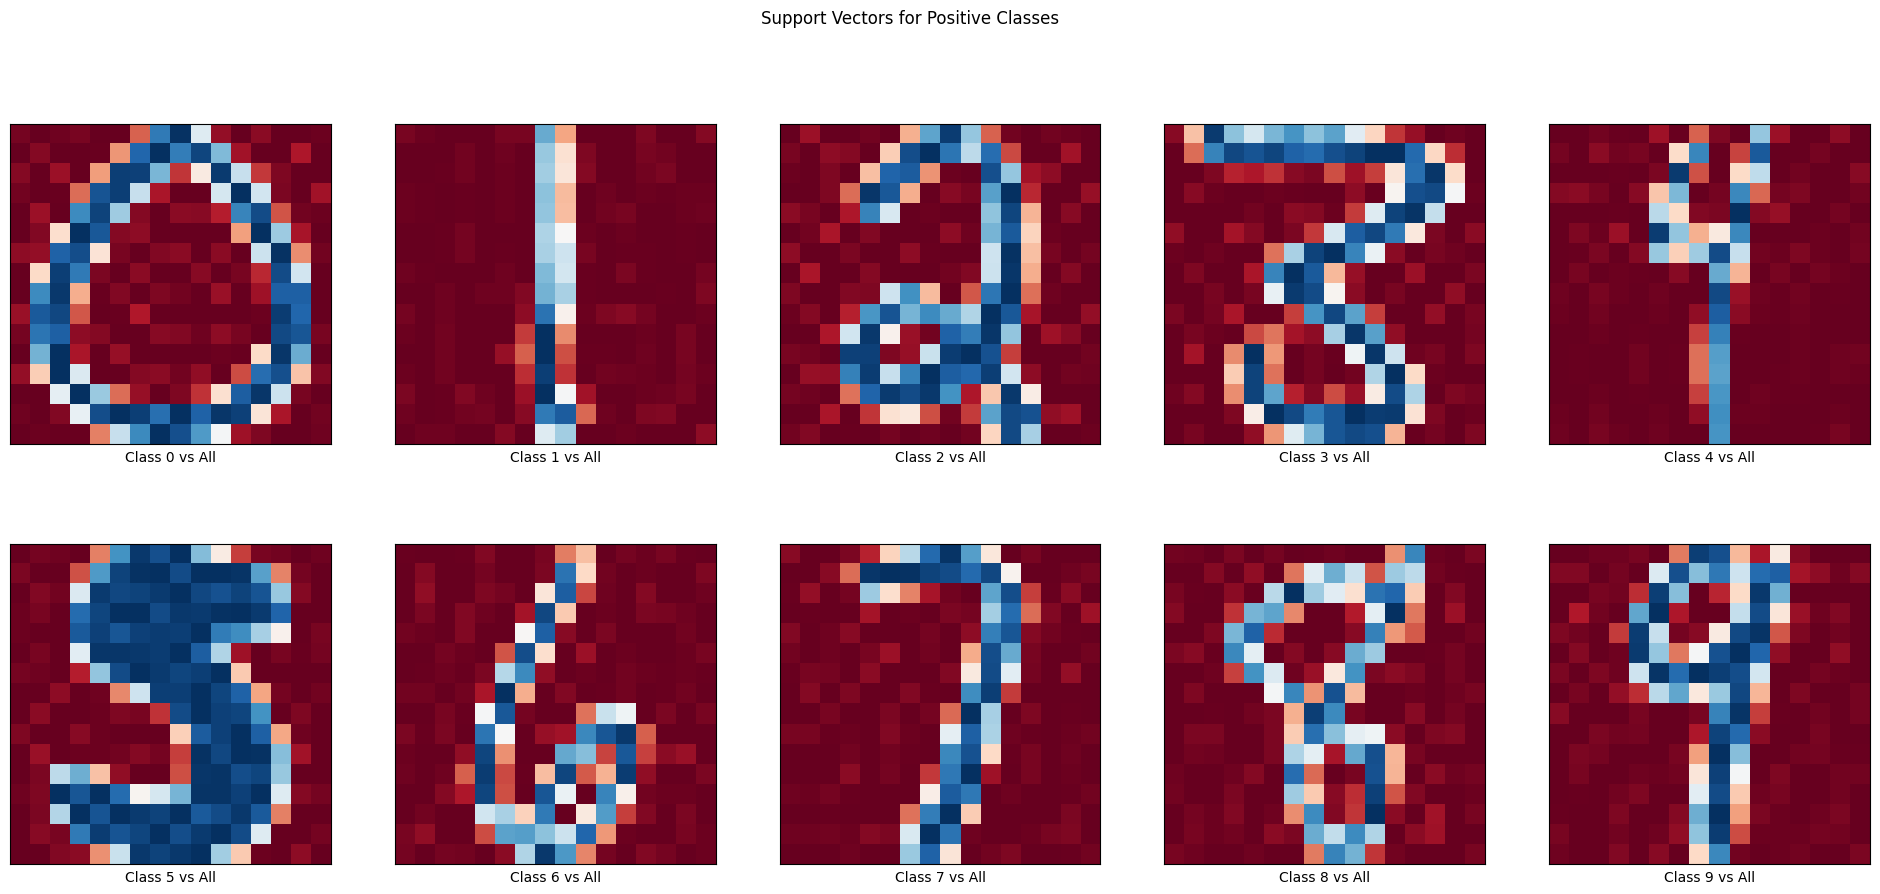

In [166]:
ind = 0
matplot.subplots(2,5, figsize=(24,10))
for i in range(len(n_supp[15])):
    l1 = matplot.subplot(2, 5, i + 1)
    sv_image = train_samp[sup_vec[15][ind:ind+n_supp[15][i]]][0]
    l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[15][i]
matplot.suptitle('Support Vectors for Positive Classes')
matplot.show()

**Sampling one negative support vector for each class**

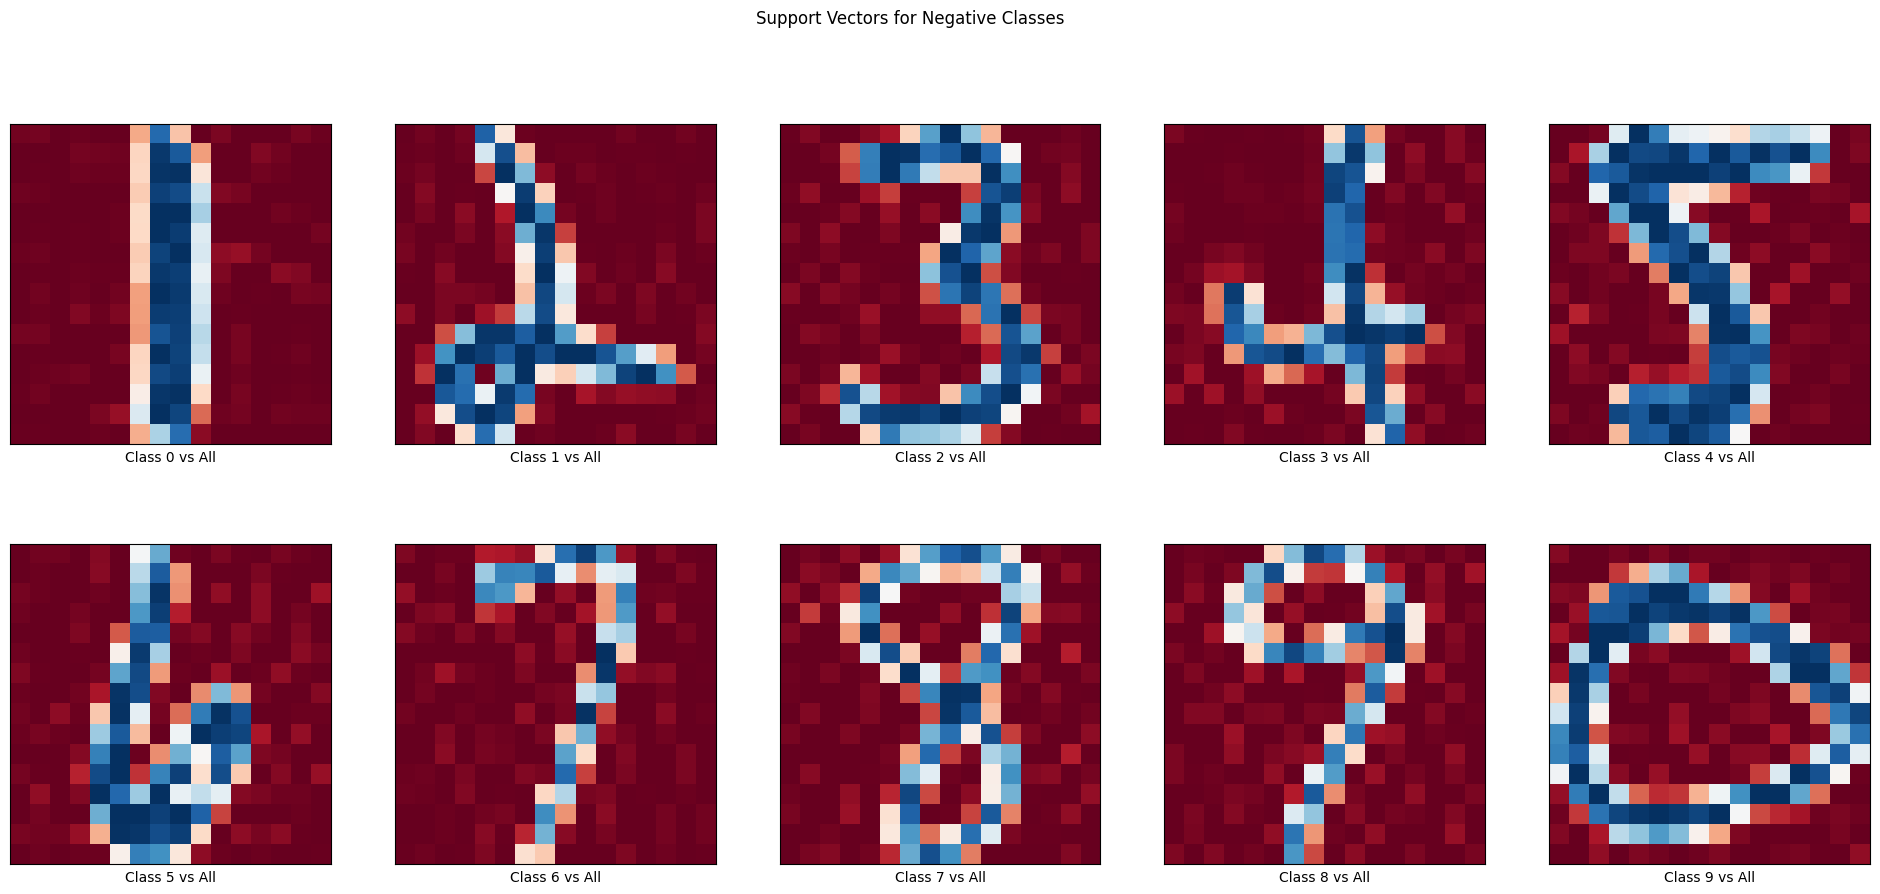

In [178]:
ind = n_supp[6][0]
matplot.subplots(2,5, figsize=(24,10))
for i in range(len(n_supp[6])-1):
    l1 = matplot.subplot(2, 5, i + 1)
    sv_image = train_samp[sup_vec[6][ind:ind+n_supp[6][i+1]]][13]
    l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[6][i+1]
ind = 0
l1 = matplot.subplot(2, 5, 10)
sv_image = train_samp[sup_vec[6][ind:ind+n_supp[6][0]]][13]
l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
l1.set_xticks(())
l1.set_yticks(())
l1.set_xlabel('Class 9 vs All')
matplot.suptitle('Support Vectors for Negative Classes')
matplot.show()

**SVC Poly kernel**

In [157]:
seq = np.random.randint(0,len(train),int(0.6*(len(train))))
train_samp = train[seq]
trlab_samp = trlab[seq]

train_samp.shape
trlab_samp.shape

(218,)

In [158]:
seq = np.random.randint(0,len(test),int(0.6*(len(test))))
test_samp = test[seq]
tslab_samp = tslab[seq]

test_samp.shape
tslab_samp.shape

(60,)

**Running SVC for multiple cost factor(s) C and Degree**

In [159]:
coefficient = []
n_supp = []
sup_vec = []
i = 0
df = pd.DataFrame(columns = ['c','degree','train_acc','test_acc'])
for c in [0.01, 0.1, 1, 10, 100]:
    for d in [2,3,4,5,6]:
        svm = SVC(kernel='poly', C=c, degree=d)
        model = svm.fit(train_samp, trlab_samp)
        globals()['model%s' % i] = model
        d_coef = svm.dual_coef_
        support = svm.n_support_
        sv = svm.support_
    
        p_tr = svm.predict(train_samp)
        a_tr = accuracy_score(trlab_samp, p_tr)
    
        pred = svm.predict(test_samp)
        a = accuracy_score(tslab_samp, pred)
    
        coefficient.append(d_coef)
        n_supp.append(support)
        sup_vec.append(sv)
        df.loc[i] = [c,d,a_tr,a]
        i=i+1

In [160]:
df

,c,degree,train_acc,test_acc
0,0.01,2.0,0.192661,0.250000
1,0.01,3.0,0.211009,0.250000
2,0.01,4.0,0.307339,0.283333
3,0.01,5.0,0.344037,0.250000
4,0.01,6.0,0.376147,0.266667
5,0.10,2.0,0.752294,0.533333
6,0.10,3.0,0.770642,0.516667
7,0.10,4.0,0.766055,0.516667
8,0.10,5.0,0.729358,0.400000
9,0.10,6.0,0.729358,0.400000


**We choose C=100 and Degree=2 to look at the Support vectors**

In [161]:
pd.DataFrame(coefficient[20]) # dual_coef_

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,128,129
0,0.000000,0.027176,0.000000,0.000000,0.418245,0.766128,0.815905,0.187585,0.000000,0.394675,...,-0.04352,-0.000000,-0.000000,-0.591764,-0.000000,-0.000000,-0.934621,-0.970180,-0.000000,-0.000000
1,0.000000,0.346330,0.186158,0.037344,0.503533,1.220914,0.704581,0.307854,0.000000,0.355584,...,-0.00000,-0.000000,-0.000000,-1.893922,-0.000000,-0.000000,-2.041381,-2.047380,-0.000000,-0.000000
2,0.081676,0.249368,0.006363,0.134743,0.314263,1.053850,1.037033,0.000000,0.023850,0.515604,...,-0.00000,-0.000000,-0.000000,-1.081711,-0.173037,-0.000000,-1.316452,-1.098804,-0.000000,-0.000000
3,0.000000,0.107783,0.000000,0.000000,0.526831,1.094050,1.005165,0.215250,0.000000,0.430017,...,-0.00000,-0.432079,-0.210339,-0.438334,-0.000000,-0.000000,-1.640132,-1.294839,-0.000000,-0.010683
4,0.000000,0.114302,0.158791,0.332932,0.485455,0.960881,0.743758,0.013536,0.175241,0.319585,...,-0.00000,-0.025327,-0.096615,-4.936421,-0.000000,-0.000000,-4.160696,-3.257285,-0.000000,-0.000000
5,0.196240,0.108500,0.088146,0.054504,0.220289,1.442378,1.160203,0.000000,0.305696,0.410323,...,-0.00000,-0.000000,-0.000000,-0.203333,-0.010728,-0.000000,-1.289499,-0.860774,-0.402087,-0.082513
6,0.000000,0.051495,0.000000,0.000000,0.610223,1.035307,0.900002,0.292938,0.000000,0.447669,...,-0.00000,-0.000000,-0.000000,-0.886792,-0.000000,-0.000000,-1.315254,-1.194897,-0.000000,-0.000000
7,0.076195,0.140849,0.048454,0.004435,0.460480,1.034456,0.752456,0.116099,0.111571,0.478059,...,-0.00000,-0.000000,-0.473643,-3.243552,-0.000000,-0.577259,-6.427854,-5.047051,-0.000000,-0.000000
8,0.076881,0.060049,0.144485,0.000000,0.605839,0.877718,0.783686,0.265998,0.000000,0.376645,...,-0.00000,-0.449639,-0.239580,-0.624064,-0.109944,-0.000000,-2.215495,-2.001902,-0.000000,-0.000000


In [162]:
pd.DataFrame(n_supp[20]) # n_support_

,0
0,12
1,4
2,12
3,14
4,19
5,18
6,9
7,15
8,11
9,16


**Sampling one positive support vector for each class**

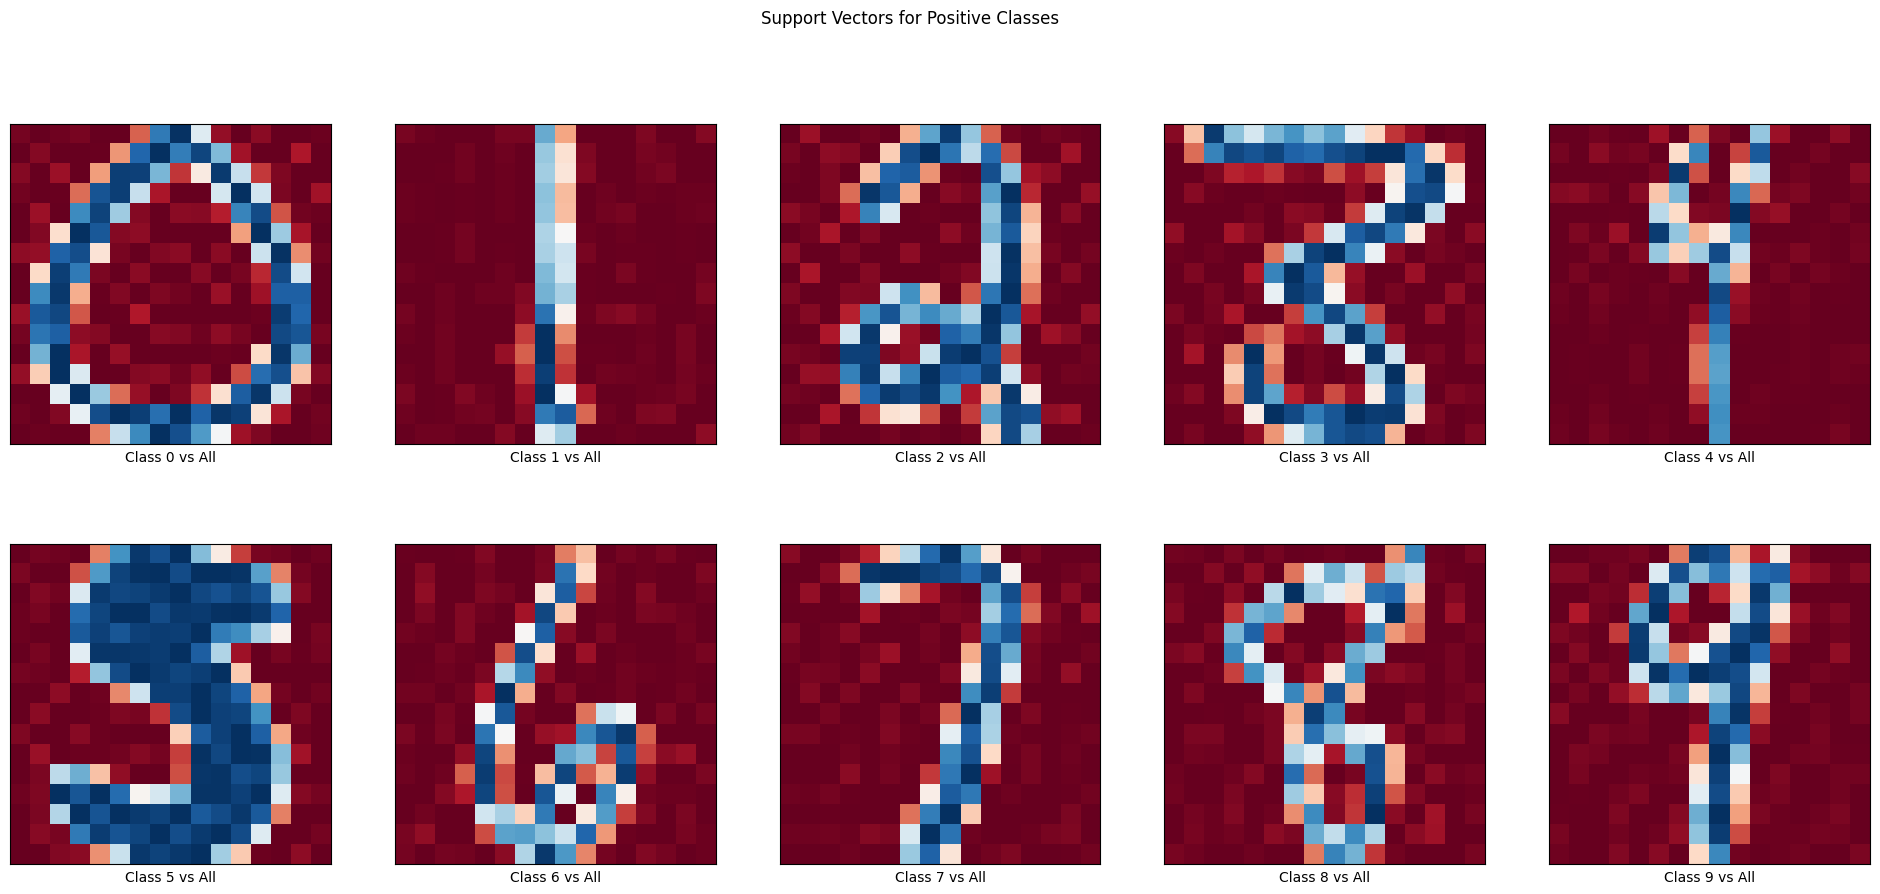

In [165]:
ind = 0
matplot.subplots(2,5, figsize=(24,10))
for i in range(len(n_supp[20])):
    l1 = matplot.subplot(2, 5, i + 1)
    sv_image = train_samp[sup_vec[20][ind:ind+n_supp[20][i]]][0]
    l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[20][i]
matplot.suptitle('Support Vectors for Positive Classes')
matplot.show()

**Sampling one negative support vector for each class**

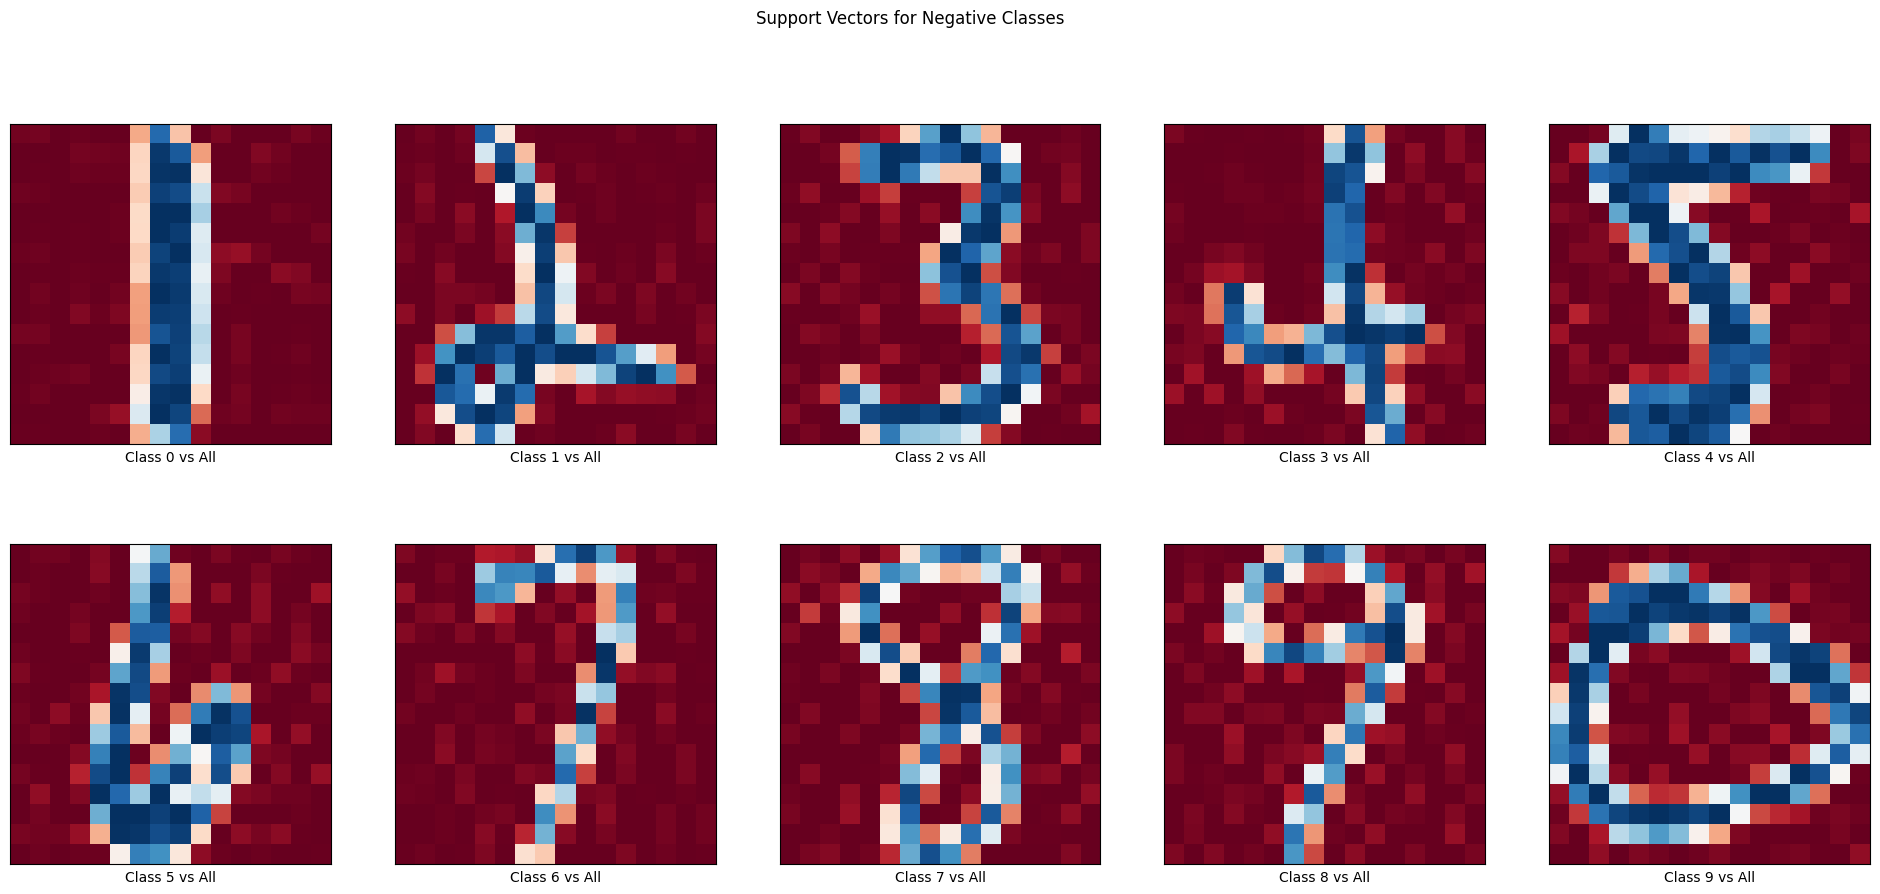

In [174]:
ind = n_supp[6][0]
matplot.subplots(2,5, figsize=(24,10))
for i in range(len(n_supp[6])-1):
    l1 = matplot.subplot(2, 5, i + 1)
    sv_image = train_samp[sup_vec[6][ind:ind+n_supp[6][i+1]]][13]
    l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i vs All' % i)
    ind = ind + n_supp[6][i+1]
ind = 0
l1 = matplot.subplot(2, 5, 10)
sv_image = train_samp[sup_vec[6][ind:ind+n_supp[6][0]]][13]
l1.imshow(sv_image.reshape(16, 16), cmap=matplot.cm.RdBu)
l1.set_xticks(())
l1.set_yticks(())
l1.set_xlabel('Class 9 vs All')
matplot.suptitle('Support Vectors for Negative Classes')
matplot.show()